In [2]:
import os

In [3]:
os.sys.path

['C:\\Users\\User\\Desktop\\miei_progetti_personali\\HACKATHON\\jupyter',
 'C:\\Users\\User\\anaconda3\\python38.zip',
 'C:\\Users\\User\\anaconda3\\DLLs',
 'C:\\Users\\User\\anaconda3\\lib',
 'C:\\Users\\User\\anaconda3',
 '',
 'C:\\Users\\User\\anaconda3\\lib\\site-packages',
 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\User\\.ipython']

In [4]:
os.sys.path


['C:\\Users\\User\\Desktop\\miei_progetti_personali\\HACKATHON\\jupyter',
 'C:\\Users\\User\\anaconda3\\python38.zip',
 'C:\\Users\\User\\anaconda3\\DLLs',
 'C:\\Users\\User\\anaconda3\\lib',
 'C:\\Users\\User\\anaconda3',
 '',
 'C:\\Users\\User\\anaconda3\\lib\\site-packages',
 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\User\\.ipython']

In [5]:
import cv2

In [12]:
cap = cv2.VideoCapture("fototest.jpg")

In [13]:
ret, frame=cap.read()

In [14]:
cap.release()

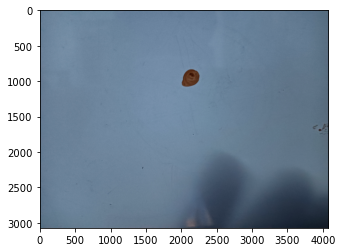

In [15]:
import matplotlib.pyplot as plt
plt.imshow(frame)

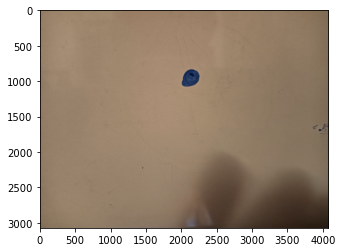

In [16]:
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb);

In [17]:
def plotFromFile(file):
    cap = cv2.VideoCapture(file)
    ret, frame = cap.read()
    cap.release()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)

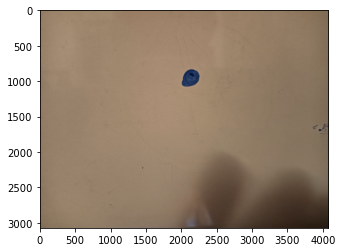

In [18]:
plotFromFile("fototest.jpg")

In [21]:
def getFromFile(file,info):
    cap = cv2.VideoCapture(file)
    ret, frame = cap.read()
    cap.release()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if(info):
        print(f'The shape of the image is {frame_rgb.shape}')
    return frame_rgb
    

The shape of the image is (3072, 4080, 3)


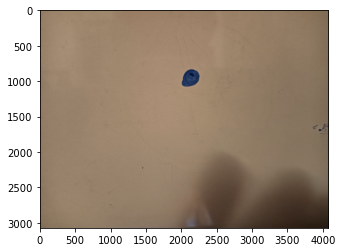

In [22]:
plt.imshow(getFromFile("fototest.jpg",1))

In [35]:
def plotFromFile(file):
    img = cv2.imread(file)
    plotOpenCVImage(img)

In [36]:
plotFromFile("fototest.jpg")

AttributeError: module 'matplotlib.pyplot' has no attribute 'plotOpenCVImage'

In [30]:
import numpy as np
image = getFromFile("fototest.jpg",0)
mask = np.zeros(image.shape[:2], dtype=np.uint8)
print(mask)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


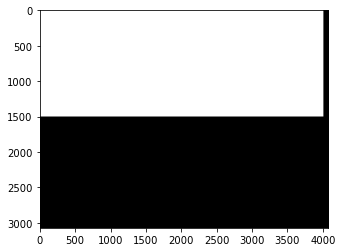

In [31]:
# then mask the region outside of these four corners
mask_corners = np.array([[0, 0], [0, 1500], [4000, 1500], [4000, 0]])
cv2.drawContours(mask, [mask_corners], -1, 255, -1)
plt.imshow(mask, cmap='gray');

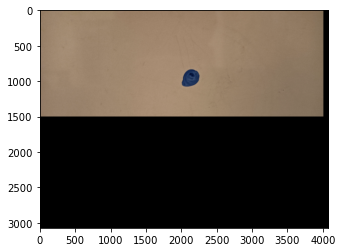

In [38]:
masked_image = cv2.bitwise_and(image,image,mask=mask)
plt.imshow(masked_image)

In [42]:
def MaskImg(file,corners):
    image = getFromFile(file,0)
    mask = np.zeros(image.shape[:2], dtype=np.uint8)#CHIEDI
    mask_corners = np.array(corners)
    cv2.drawContours(mask, [mask_corners], -1, 255, -1)
#     plt.imshow(mask, cmap='gray')
    masked_image = cv2.bitwise_and(image,image,mask=mask)
    plt.imshow(masked_image)
    return masked_image

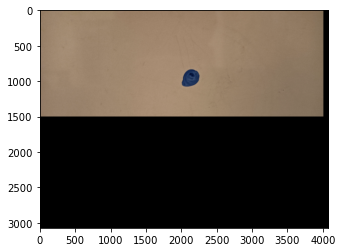

In [43]:
img=MaskImg("fototest.jpg",[[0, 0], [0, 1500], [4000, 1500], [4000, 0]])

In [44]:
hsv_image =  cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [76]:
def getLimits(b,g,r,rangeWidth):
    arr = [[[b,g,r]]]
    color = np.uint8(arr)
    hsvColor = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
    lowerLimit = [hsvColor[0][0][0]-rangeWidth,40,40]
    upperLimit = [hsvColor[0][0][0]+rangeWidth,255,255]
    return [lowerLimit,upperLimit]

In [77]:
limits = getLimits(255,0,0,20)
lowerLimit = limits[0]
upperLimit = limits[1]

In [57]:
blue = np.uint8([[[255, 0, 0]]]) #here insert the bgr values which you want to convert to hsv
hsvBlue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
print(hsvBlue)

# lowerLimit = hsvBlue[0][0][0] - 10, 100, 100
# upperLimit = hsvBlue[0][0][0] + 10, 255, 255

print(hsvBlue[0][0][0])

rangeWidth = 20

lowerLimit = [hsvBlue[0][0][0]-rangeWidth,40,40]
upperLimit = [hsvBlue[0][0][0]+rangeWidth,255,255]

print(upperLimit)
print(lowerLimit)

[[[120 255 255]]]
120
[140, 255, 255]
[100, 40, 40]


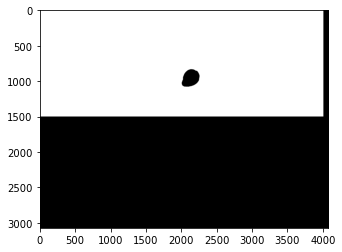

In [78]:
blue_regions = cv2.inRange(hsv_image, np.array(lowerLimit), np.array(upperLimit))#lower and upper limit are to be enclosed in an np array
plt.imshow(blue_regions, cmap='gray');

{'m00': 5999939.0, 'm10': 11999975759.0, 'm01': 4499980399.333333, 'm20': 31999967163900.832, 'm11': 8999999961706.75, 'm02': 4499979202347.833, 'm30': 9.599995377407453e+16, 'm21': 2.3999999972395336e+16, 'm12': 8999999980719318.0, 'm03': 5062476692720636.0, 'mu20': 7999820126308.012, 'mu11': -34156635.9765625, 'mu02': 1124974290733.8672, 'mu30': -43132513840.0, 'mu21': 21762740776.0, 'mu12': 19491618787.25, 'mu03': 1436874611.0, 'nu20': 0.22222174421660812, 'nu11': -9.488147362616363e-07, 'nu02': 0.031249921265554242, 'nu30': -4.891450723032604e-07, 'nu21': 2.468007649607847e-07, 'nu12': 2.2104506397109614e-07, 'nu03': 1.629490314651028e-08}
Centroid of green dot: (x, y) = (2000.0, 750.0)


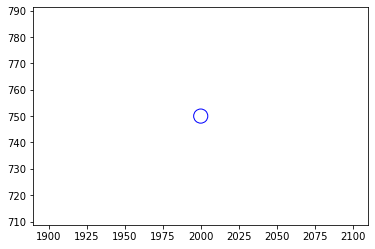

In [79]:
# plotOpenCVImage(masked_image);
contours, _ = cv2.findContours(blue_regions, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)#CHIEDI
blue_dots_positions = []

for contour in contours:
#   print(f"area = {cv2.contourArea(contour)}")
  if cv2.contourArea(contour) > 100000: # Minimum contour area threshold
     M = cv2.moments(contour)
     print(M)
     center_x = M["m10"] / M["m00"]
     center_y = M["m01"] / M["m00"]#CHIEDI
     print(f"Centroid of green dot: (x, y) = ({center_x:.1f}, {center_y:.1f})")
     plt.scatter(center_x, center_y, color='blue', marker='o', facecolor='none', s=200);#s is the size of the scattered contour
     blue_dots_positions.append([center_x, center_y])
